# Random Forrest Regression

In [116]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Display the first few rows of each DataFrame as scrollable tables in Jupyter Notebook
from IPython.display import display

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [117]:
# Load the electricity consumption dataset
filepath = 'C:/Users/madsh/OneDrive/Dokumenter/kandidat/Fællesmappe/Speciale/Forecasting-energy-consumption-in-Denmark/Data/Combined data/'
data_interpolation = pd.read_csv(filepath+'combined_daily_interpolation.csv')
data_flagged = pd.read_csv(filepath + 'combined_daily_flagged.csv')

# Put HourDK as DataFrame index
data_interpolation.set_index('HourDK', inplace=True)
data_flagged.set_index('HourDK', inplace=True)

In [118]:
# Re-split the data into training and test sets based on the criteria
training_set = data_interpolation.loc[data_interpolation.index <= '2022-06-30']
test_set = data_interpolation.loc[data_interpolation.index > '2022-06-30']


In [119]:
# Define features and target variable for training set
X_train = training_set.drop(['GrossConsumptionMWh'], axis=1)
y_train = training_set['GrossConsumptionMWh']

# Define features for test set
X_test = test_set.drop(['GrossConsumptionMWh'], axis=1)
y_test = test_set['GrossConsumptionMWh']

# Initialize variables to store ensemble predictions and the number of models
ensemble_predictions = np.zeros_like(y_test)
n_models = 1
individual_predictions = []

# Train multiple Random Forest models with different random seeds and make predictions
for seed in range(n_models):
    # Initialize and train a Random Forest model with a different random seed
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=seed*n_models)
    rf_regressor.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = rf_regressor.predict(X_test)
    
    # Add the predictions to the ensemble
    ensemble_predictions += y_pred  
    
    # Add the predictions to the list for plotting
    individual_predictions.append(y_pred)

# Average the ensemble predictions
ensemble_predictions /= n_models  

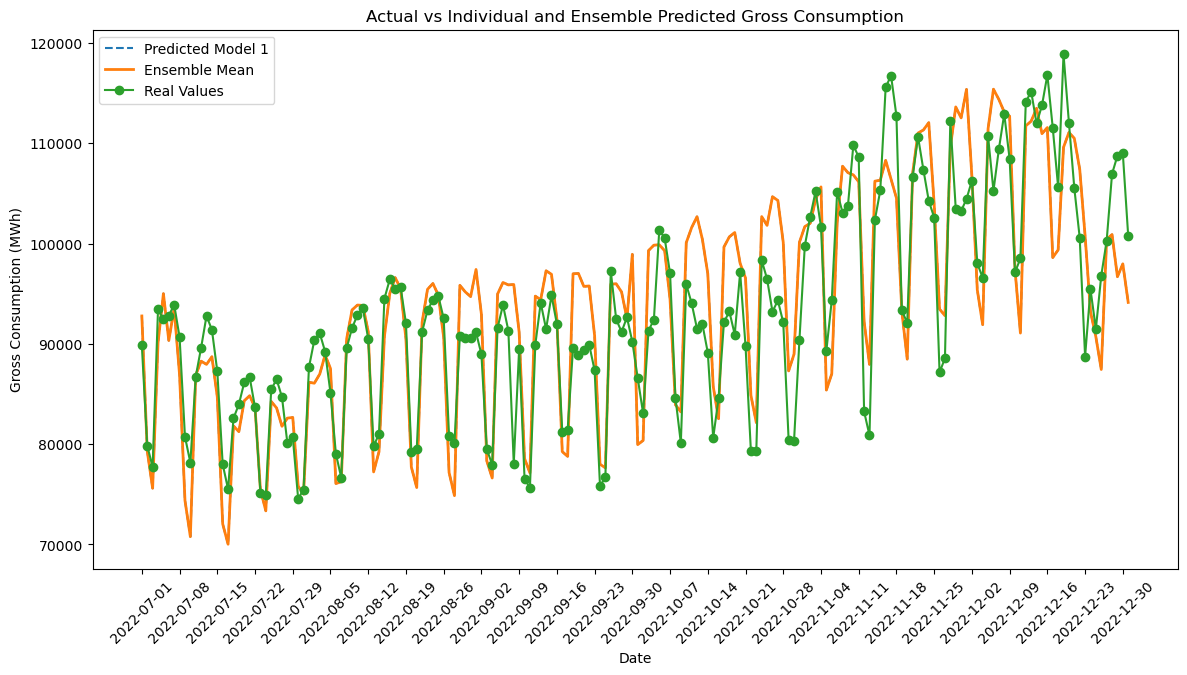

In [120]:
# Plot individual model predictions
# Plotting the real and predicted values for better visualization
plt.figure(figsize=(14, 7))

for i, y_pred in enumerate(individual_predictions):
    plt.plot(y_pred, label=f'Predicted Model {i+1}', linestyle='--')

# Plot ensemble mean predictions
plt.plot(ensemble_predictions, label='Ensemble Mean', linewidth=2, linestyle='-')
# Plotting the real values
plt.plot(np.array(y_test), label='Real Values', marker='o')

plt.xlabel('Date')
plt.ylabel('Gross Consumption (MWh)')
plt.title('Actual vs Individual and Ensemble Predicted Gross Consumption')
plt.xticks(np.arange(0, len(X_test), 7), X_test.index[::7])
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [121]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#mse, rmse, mae, r2
print(f" MSE = {mse}\n MSE = {mse}\nRMSE = {rmse}\n  r2 = {r2}")

 MSE = 26983732.60893803
 MSE = 26983732.60893803
RMSE = 5194.5868564244865
  r2 = 0.7566238172473092


## Flagged Data

In [122]:
# Re-split the data into training and test sets based on the criteria
training_set = data_flagged.loc[data_interpolation.index <= '2022-06-30']
test_set = data_flagged.loc[data_interpolation.index > '2022-06-30']

In [123]:
# Define features and target variable for training set
X_train = training_set.drop(['GrossConsumptionMWh'], axis=1)
y_train = training_set['GrossConsumptionMWh']

# Define features for test set
X_test = test_set.drop(['GrossConsumptionMWh'], axis=1)
y_test = test_set['GrossConsumptionMWh']

# Custom prediction function
def custom_predict(X, model):
    y_ols = model.predict(X)
    
    # Apply the flagged logic
    y_pred = np.where(X['flagged'] == 1, 0, y_ols)
    
    return y_pred

# Initialize variables to store ensemble predictions and the number of models
ensemble_predictions = np.zeros_like(y_test)
n_models = 1
individual_predictions = []

# Train multiple Random Forest models with different random seeds and make predictions
for seed in range(n_models):
    # Initialize and train a Random Forest model with a different random seed
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=seed*100)
    rf_regressor.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = custom_predict(X_test, rf_regressor)
    
    # Add the predictions to the ensemble
    ensemble_predictions += y_pred  
    
    # Add the predictions to the list for plotting
    individual_predictions.append(y_pred)

# Average the ensemble predictions
ensemble_predictions /= n_models  

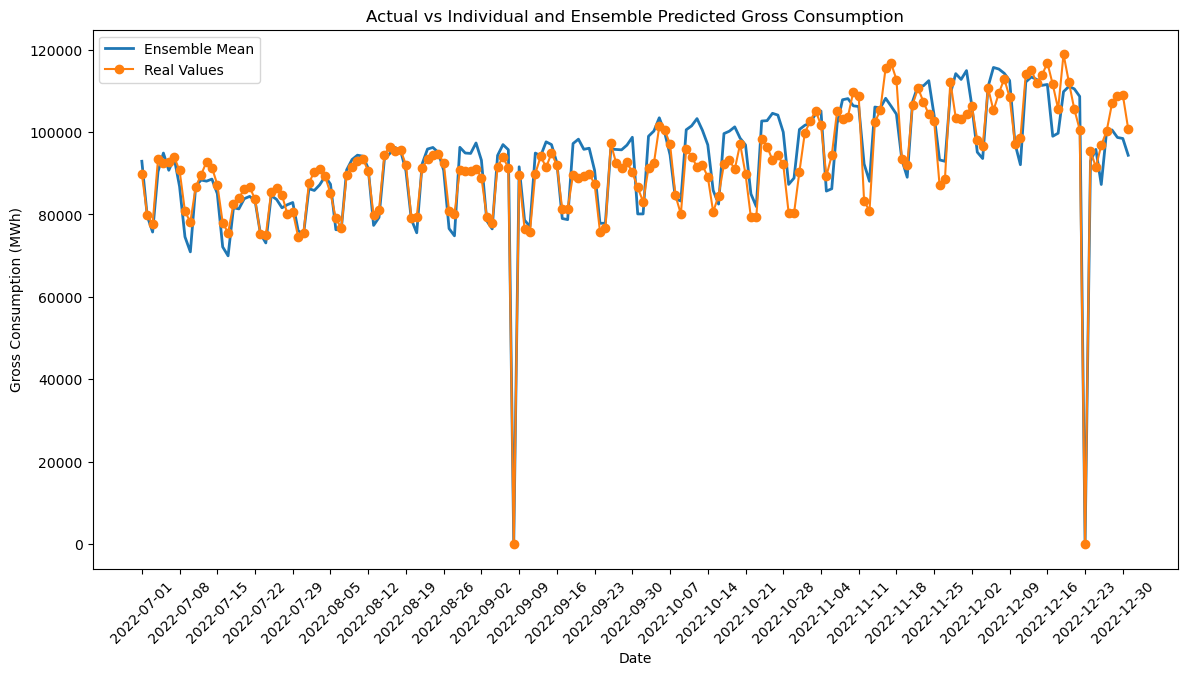

In [124]:
# Plot individual model predictions
# Plotting the real and predicted values for better visualization
plt.figure(figsize=(14, 7))

#for i, y_pred in enumerate(individual_predictions):
    #plt.plot(y_pred, label=f'Predicted Model {i+1}', linestyle='--')

# Plot ensemble mean predictions
plt.plot(ensemble_predictions, label='Ensemble Mean', linewidth=2, linestyle='-')
# Plotting the real values
plt.plot(np.array(y_test), label='Real Values', marker='o')

plt.xlabel('Date')
plt.ylabel('Gross Consumption (MWh)')
plt.title('Actual vs Individual and Ensemble Predicted Gross Consumption')
plt.xticks(np.arange(0, len(X_test), 7), X_test.index[::7])
plt.xticks(rotation=45)
plt.legend()
plt.show()

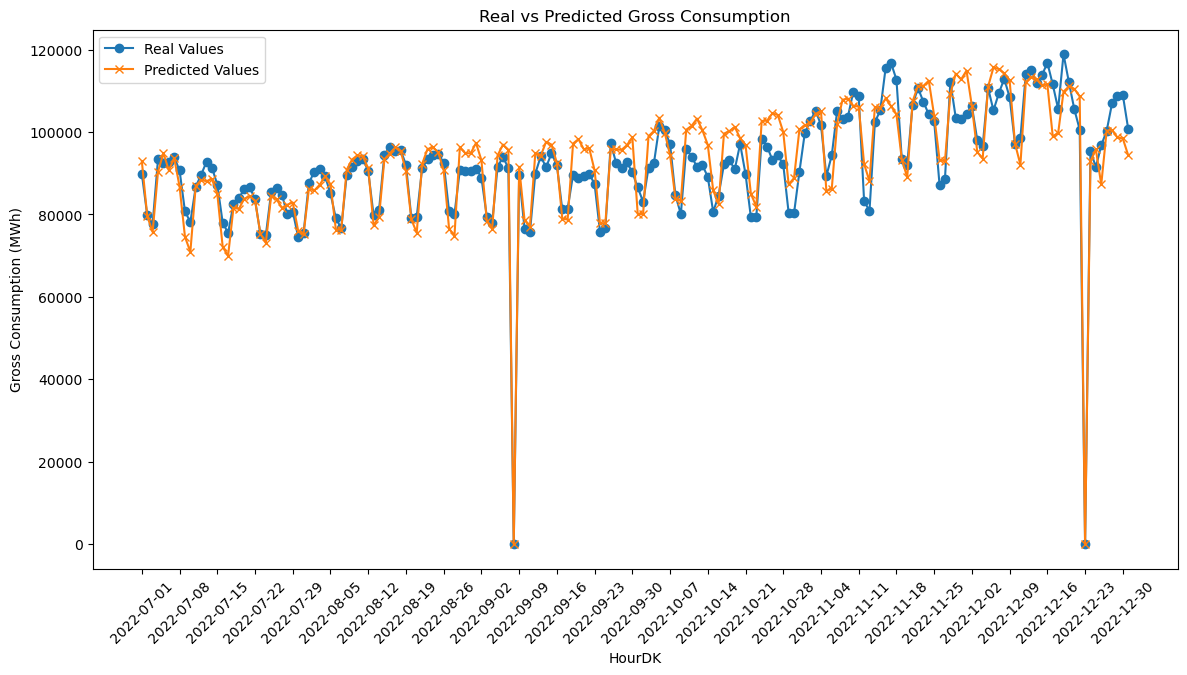

In [125]:
# Plotting the real and predicted values for better visualization
plt.figure(figsize=(14, 7))

# Plotting the real values
plt.plot(np.array(y_test), label='Real Values', marker='o')

# Plotting the predicted values
plt.plot(y_pred, label='Predicted Values', marker='x')

# Adding labels, title, and legend
plt.xlabel('HourDK')
plt.ylabel('Gross Consumption (MWh)')
plt.title('Real vs Predicted Gross Consumption')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show only every 7th date
plt.xticks(np.arange(0, len(X_test), 7), X_test.index[::7]) # Replace 'hour_dk_values' with your actual array of dates

# Show the plot
plt.show()

In [126]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#mse, rmse, mae, r2
print(f" MSE = {mse}\n MSE = {mse}\nRMSE = {rmse}\n  r2 = {r2}")

 MSE = 24761314.672889348
 MSE = 24761314.672889348
RMSE = 4976.07422300847
  r2 = 0.877787887984717


# START HERE

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [128]:
# Re-split the data into training and test sets based on the criteria
training_set = data_flagged.loc[data_interpolation.index <= '2022-06-30']
test_set = data_flagged.loc[data_interpolation.index > '2022-06-30']

In [129]:
# Define features and target variable for training set
X_train = training_set.drop(['GrossConsumptionMWh'], axis=1)
y_train = training_set['GrossConsumptionMWh']

# Define features for test set
X_test = test_set.drop(['GrossConsumptionMWh'], axis=1)
y_test = test_set['GrossConsumptionMWh']

In [130]:
# Custom prediction function
def custom_predict(X, model):
    y_pred = model.predict(X)
    
    # Apply the flagged logic
    y_custom_pred = np.where(X['flagged'] == 1, 0, y_pred)
    
    return y_custom_pred

In [131]:
# Calculate performance metrics function
def metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f" MSE = {mse}\n MSE = {mse}\nRMSE = {rmse}\n  r2 = {r2}")

### Baseline

In [132]:
# Initialize and train a Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set using the custom prediction function
y_pred = custom_predict(X_test, rf_regressor)

metrics(y_test, y_pred)

 MSE = 24441193.72529574
 MSE = 24441193.72529574
RMSE = 4943.8035686398125
  r2 = 0.8793678790967633


### Hyper parameter optimazation

In [133]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search with 3-fold cross validation
rf_grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                              cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = rf_grid_search.best_params_
best_params

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [134]:
# Initialize and train a Random Forest model with the best parameters
rf_optimized = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
rf_optimized.fit(X_train, y_train)

# Make predictions on the test set using the custom prediction function
y_pred_optimized = custom_predict(X_test, rf_optimized)

# Calculate performance metrics for the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)

# Compare baseline and optimized metrics
baseline_metrics = {'MSE': mse, 'RMSE': rmse, 'MAE': mae}
optimized_metrics = {'MSE': mse_optimized, 'RMSE': rmse_optimized, 'MAE': mae_optimized}

print("Before Hyperparameter optimazation:")
metrics(y_test, y_pred)

print("\nAfter Hyperparameter optimazation:")
metrics(y_test, y_pred_optimized)

Before Hyperparameter optimazation:
 MSE = 24441193.72529574
 MSE = 24441193.72529574
RMSE = 4943.8035686398125
  r2 = 0.8793678790967633

After Hyperparameter optimazation:
 MSE = 21144258.35232104
 MSE = 21144258.35232104
RMSE = 4598.288632993914
  r2 = 0.8956402556014845


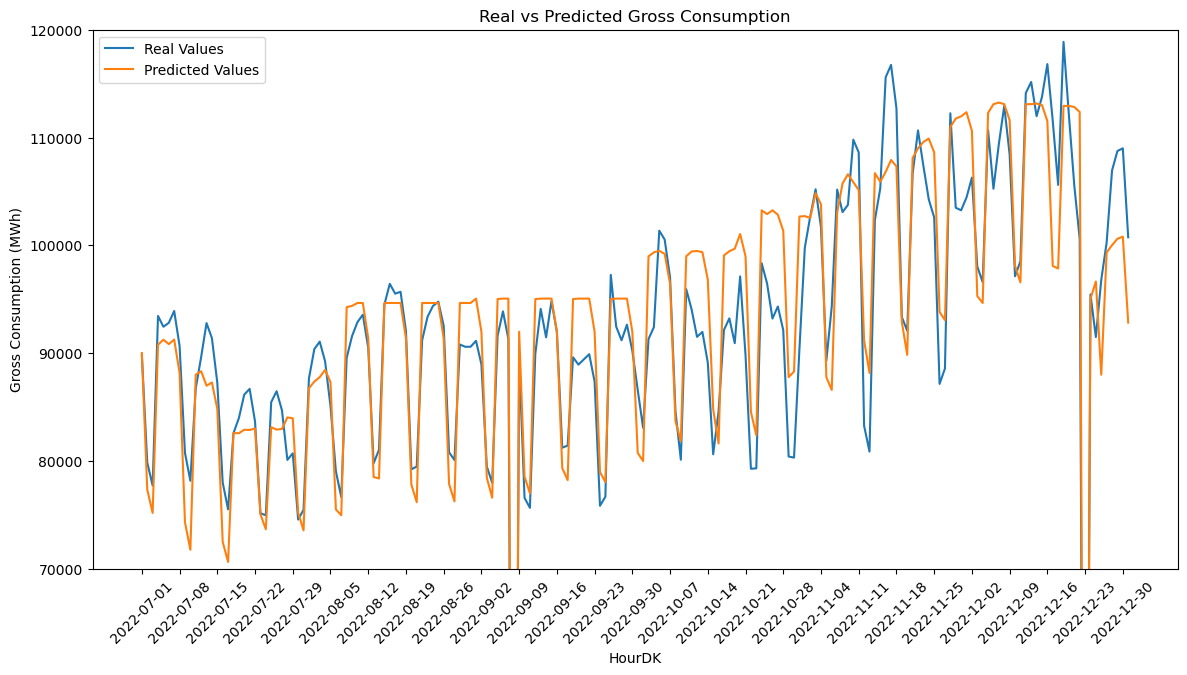

In [135]:
# Plotting the real and predicted values for better visualization

plt.figure(figsize=(14, 7))                                 # Setting Plot size

plt.plot(np.array(y_test), label='Real Values')             # Plotting the real values
plt.plot(y_pred_optimized, label='Predicted Values')        # Plotting the predicted values

plt.xlabel('HourDK')                                        # Adding labels
plt.ylabel('Gross Consumption (MWh)')                       # Adding labels
plt.title('Real vs Predicted Gross Consumption')            # Adding title
plt.legend()                                                # Adding legend
plt.xticks(rotation=45)                                     # Rotating x-axis labels for better readability
plt.ylim(70000, 120000)                                     # Set y-axis limits
plt.xticks(np.arange(0, len(X_test), 7), X_test.index[::7]) # Show only every 7th date

plt.show()